#### This notebook should be used for own investigations around the Dirac equation e.g. in the context of chapter 3.1 of the book.

In [1]:
from sympy import *

The module heppackv0.py should be available in the main notebook directory. It contains Pauli- and Dirac Matrizes, spinors like $u(p,s)$, currents like $\bar{u}\gamma^\mu u$ etc.

In [2]:
import heppackv0 as hep

Reading heppackv0.py (july 2022)

Done


In [3]:
theta,phi=symbols('theta phi',positive=True)
E,M,m,p,r=symbols('E M m p r',positive=True)

Particles are characterized by an array containing their energy, mass, polar and azimuthal angle: $[E,m,\theta,\phi]$. 
We use pe= particle in xz plane, peneg=-pe, pez= particle along z xis, pexyz = general particle, pe0=particle at rest. 

In [4]:
pe=[E,m,theta,0]

In [5]:
peneg=[E,m,pi-theta,pi]

In [6]:
pez=[E,m,0,0]

In [7]:
pexyz=[E,m,theta,phi]

In [8]:
pemin=[E,m,pi-theta,pi+phi]

In [9]:
pe0=[m,m,0,0]

These arrays can be converted into four vectors $[E,p_x,p_y,p_z]$. To make calculations easier, momenta are expressed as function of $\theta/2$.

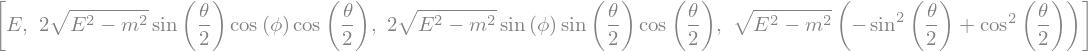

In [10]:
pe4xyz=hep.fourvec(pexyz);pe4xyz

## 1) helicity spinors

All calculations of the book are performed using spinors of defined positive or negative helicity, e.g. $u(pe,1)$ is a particle spinor with momentum $pe$ and positive helicity ($\lambda=1/2$), $v(pe,-1)$ an antiparticle spinor with negative helicity ($\lambda=-1/2$).

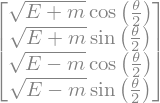

In [11]:
hep.u(pe,1)

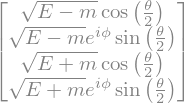

In [12]:
hep.v(pexyz,-1)

In [13]:
hep.vbar(pe,1)

Check the normalization (not Bjorken Drell)

In [14]:
norm=hep.ubar(pe,1)*hep.u(pe,1);norm

In [15]:
simplify(norm)

## 2) Dirac Equation for spinors

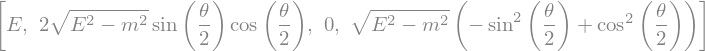

In [16]:
pe4=hep.fourvec(pe);pe4

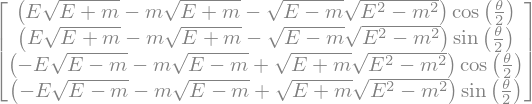

In [17]:
dir=simplify(hep.dag(pe4)*hep.u(pe,1)-m*hep.u(pe,1));dir

All algebraic programs have difficulties to simplify the factors multiplying the trigonometric functions   and thus proving $(\not\!{p}-m)u(p_e,1)=0$. One may for example assert $\sqrt{E^2-m^2}=\sqrt{E+m}\sqrt{E-m}$ by hand:

In [18]:
simplify(dir.subs(sqrt(E**2-m**2),sqrt(E+m)*sqrt(E-m)))

## 3) Spin Matrices and more
heppackv0.py provides explicit expressions for $\gamma^\mu$ and $\gamma_5=\gamma^5$:

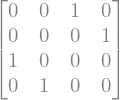

In [19]:
hep.g5

conjugate,transpose:


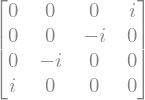

In [20]:
print('conjugate,transpose:')
hep.g2.C.T

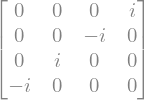

In [21]:
hep.g2*hep.g0

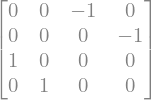

In [22]:
hep.g5*hep.g0

The famous antisymmetric tensor $\sigma^{\mu\nu}=\frac{\mathrm i}{2}(\gamma^\mu\gamma^\nu-\gamma^\nu\gamma^\mu)$ is easily calculated. For the spacelike components $i,j=1..3$ there are 3 nonvanishing elements $\sigma^{ij}$.

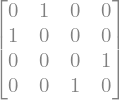

In [23]:
S1=I/2*(hep.g2*hep.g3-hep.g3*hep.g2);S1

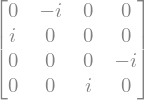

In [24]:
S2=I/2*(hep.g3*hep.g1-hep.g1*hep.g3);S2

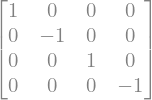

In [25]:
S3=I/2*(hep.g1*hep.g2-hep.g2*hep.g1);S3

The $S_i$ form a fourdimensional representation of the Pauli matrices. Proof:

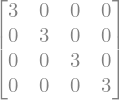

In [26]:
S1*S1+S2*S2+S3*S3

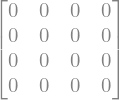

In [27]:
I/2*(S1*S3-S3*S1)-S2

$S_3/2=\frac{\mathrm i}{4}(\gamma^1\gamma^2-\gamma^2\gamma^1)$ may serve as the spin operator for solutions of the Dirac equation in the rest system. There are four solutions, the normalization factor $N_S=\sqrt{2m}$ is already included. 

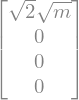

In [28]:
w1=sqrt(2*m)*Matrix([[1],[0],[0],[0]]);w1

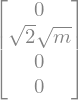

In [29]:
w2=sqrt(2*m)*Matrix([[0],[1],[0],[0]]);w2

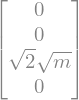

In [30]:
w3=sqrt(2*m)*Matrix([[0],[0],[1],[0]]);w3

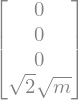

In [31]:
w4=sqrt(2*m)*Matrix([[0],[0],[0],[1]]);w4

$w_1,w_2$ are solutions of positive energy and spins up and down along the z-axis.

In [32]:
w1==hep.u(pe0,1)

True

The antiparticle helicity spinor $v(p,-1)$ corresponds to an negative energy solution with spin up along the $z$ axis in the rest system. Vice versa for $v(p,1)$.

In [33]:
w3==hep.v(pe0,-1)

True

The spin assignment can be checked by equations like the following one:

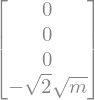

In [34]:
S3*w4

The operator
$-\gamma_5\!\! \not\!s$ (where $s$ is the spin four vector) handles the helicity assignments properly. In the rest system we have $s^\mu=(0,0,0,1)$ with $s^2=-1$.  The helicity operator $H_3$ in the z direction of the rest system is therefore (skipping the factor $1/2$):

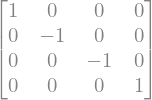

In [35]:
H3=-hep.g5*hep.g3;H3

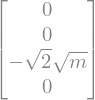

In [36]:
H3*hep.v(pe0,-1)

$\gamma_5\!\! \not\!s$  is written invariantly and consequently is also the proper helicity operator in the Lab.
A Lorentz boost along he $z$-axis transforms the momentum fourvector of the restsystem to $(E,0,0,p)$ and the spin vector to $(p/m,0,0,E/m)$ with $p$ an abbreviation for $\sqrt{E^2-m^2}$. Forgetting again the the factor 1/2 for convenience we get

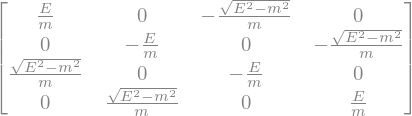

In [37]:
H3=hep.g5*hep.g0*sqrt(E**2-m**2)/m-hep.g5*hep.g3*E/m;H3

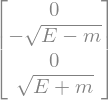

In [38]:
test=simplify(H3.subs(sqrt(E**2-m**2),sqrt(E-m)*sqrt(E+m))*hep.v(pez,1));test

where we like in line 16 have helped a little bit by hand.

In [39]:
test==hep.v(pez,1)

True

The textbooks usually quote the helicity projection operator
$\Sigma=(1+\gamma_5\!\! \not\!s)/2$. 

Another projection operator is $(1\pm\gamma_5)/2$ which selects  states with positive or negative chirality, i.e. eigenstates of $\gamma_5$ withe eigenvalues $\pm 1$. 

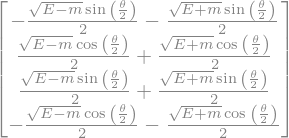

In [40]:
hep.projm*hep.u(pe,-1)

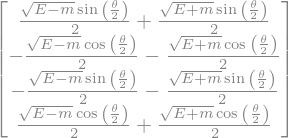

In [41]:
hep.g5*hep.projm*hep.u(pe,-1)

For massless fermions the chirality eigenstates are given by the heicity states. 

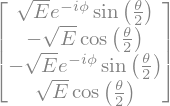

In [42]:
test=hep.g5*hep.u(pexyz,-1).subs(m,0);test

In [43]:
test==hep.g5*hep.u(pexyz,-1).subs(m,0)

True

Wirkung der chiralen Projektionsoperatoren auf Helizitätszustände

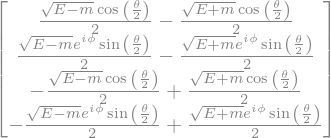

In [44]:
hep.projm*hep.v(pexyz,-1)

$\gamma_5$ generically transforms a particle with negative helicity  into an antiparticle with positive helicity and vice versa:

In [45]:
hep.g5*hep.u(pexyz,-1)==hep.v(pexyz,1)

True

## 4) C,P,T

Charge conjugation  $C$ transforms a particle with given helicity into an antiparticle with the same helicity,
$\psi\to\psi_C={\mathrm i}\gamma^2\psi^*$. Here as example $v(p,1)=\imath\gamma2 u^*(p,1)$. Not knowing how to force sympy tu assume $E-m >0$ I do the complex conjugate by hand.

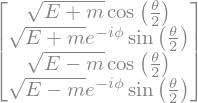

In [46]:
ustar=hep.u(pexyz,1).subs(phi,-phi);ustar 

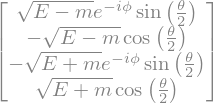

In [47]:
uC=I*hep.g2*ustar;uC

In [48]:
hep.v(pexyz,1)==uC

True

We could define a charge conjugation operator $C=\imath \gamma_2$ acting on $\psi^*$. In the literature this symbol is reserved to $C=\imath \gamma_2\gamma_0$ acting on $\bar{\psi}^T$ ($T$ means "transpose"), therefore $\psi_C=C\bar{\psi}^T$. Of course both definitions are equivalent.

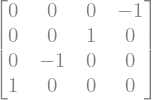

In [49]:
C=I*hep.g2*hep.g0;C

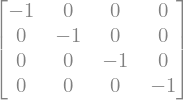

In [50]:
C*C

In [51]:
uC==C*hep.ubar(pexyz,1).T

True

In [52]:
C*hep.ubar(pexyz,-1).T==-hep.v(pexyz,-1)

True

In [53]:
C*C*hep.ubar(pexyz,1).T==C*hep.v(pexyz,1)

True

In [54]:
hep.ubar(pexyz,1).T==-C*hep.v(pexyz,1)

True

In [55]:
I*hep.g2*hep.v(pe,-1).subs(phi,-phi)==-hep.u(pe,-1)

True

In [56]:
I*hep.g2*hep.projpl*(hep.v(pexyz,-1).subs(phi,-phi))==-hep.projm*hep.u(pexyz,-1)

True

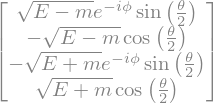

In [57]:
C*hep.ubar(pexyz,1).T

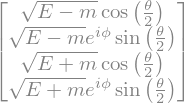

In [58]:
hep.v(pexyz,-1)

In [59]:
C*hep.g5==hep.g5*C

True

In [60]:
hep.g5*hep.v(pexyz,1)==hep.u(pexyz,-1)

True

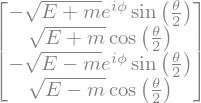

In [61]:
C*(hep.g5*hep.u(pexyz,1))

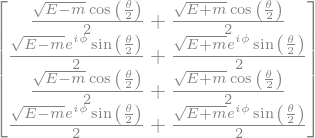

In [62]:
Ru=hep.projpl*hep.u(pexyz,1);Ru

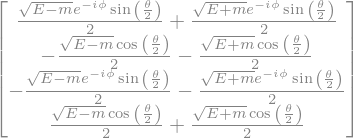

In [63]:
RuC=I*hep.g2*Ru.subs(phi,-phi);RuC

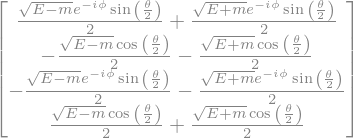

In [64]:
Lv=hep.projm*hep.v(pexyz,1);Lv

In [65]:
RuC==Lv

True

Now $\bar{\psi}_C=-\imath\bar{\psi}^*\gamma_2=\psi^TC$

In [66]:
ubarstar=hep.ubar(pexyz,1).subs(phi,-phi);ubarstar

In [67]:
hep.vbar(pexyz,1)==-ubarstar*I*hep.g2

True

In [68]:
hep.vbar(pexyz,1)==transpose(hep.u(pexyz,1))*C

True

In the $x,z$-plane the spinors are real. Therefore charge conjugation  simplifies a lot.

In [69]:
I*hep.g2*hep.u(pe,1)==hep.v(pe,1)

True

that is $u(p_e,1)_C=v(p_e,1)$. 

The parity operation $P$ transforms $\vec{p}\rightarrow -\vec{p}$ and 
$\lambda\rightarrow-\lambda$. For spinors  $\psi\to\psi_P =P\psi$ with $P=\gamma^0$ holds.

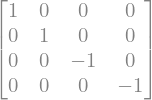

In [70]:
P=hep.g0;P

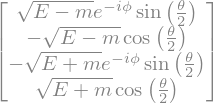

In [71]:
hep.v(pexyz,+1)

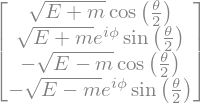

In [72]:
P*hep.u(pexyz,1)

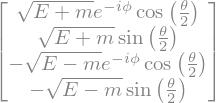

In [73]:
uP=expand(hep.u(pemin,-1));uP

In [74]:
P*hep.u(pexyz,1)==exp(I*phi)*uP

True

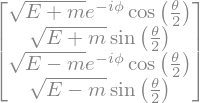

In [75]:
uret=expand(P*hep.u(pemin,-1));uret

In [76]:
uret==exp(-I*phi)*hep.u(pexyz,1)

True

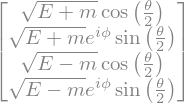

In [77]:
P*exp(I*phi)*uP

In [78]:
hep.u(peneg,-1)==P*hep.u(pe,1)

True

that is $Pv(E,\vec{p},1)=v(E,-\vec{p},-1)$. 

Time reversal $T$ transforms $\vec{p}\rightarrow -\vec{p}$ leaving $\lambda$ unchanged. In applying $T$ to spinors one has to consider the antiunitarian character of the time reversal operator. Ths means that $T=-\gamma^1\gamma^3$ has to be applied to the complex conjugate spinors (see Bjorken Drell), $\psi\to\psi_T =T\psi^*$.

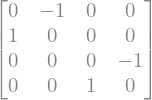

In [79]:
T=-hep.g1*hep.g3;T

In the xz plane complex conjugation is not relevant and thus:

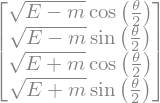

In [80]:
T*hep.v(peneg,-1)

In [81]:
T*hep.v(peneg,-1)==hep.v(pe,-1)

True

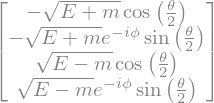

In [82]:
uT=T*hep.u(pexyz,-1);uT

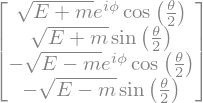

In [83]:
uneg=expand(hep.u(pexyz,-1).subs(theta,pi-theta).subs(phi,phi+pi))
unegCC=uneg.subs(phi,-phi);unegCC

Combining the 3 transformation-matrices yields $TPC=\gamma_5$

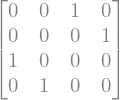

In [84]:
cpt=T*P*I*hep.g2;cpt

In [85]:
cpt==hep.g5

True

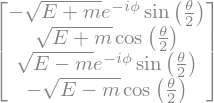

In [86]:
test=cpt*hep.v(pexyz,1);test

In [87]:
test==hep.u(pexyz,-1)

True

Applying $TPC$ to complex spinors is easy because the complex conjugation in the rules for $C$ and $T$ cancel
each other. If you still have doubts, do it step by step: 

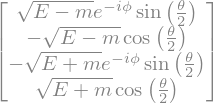

In [88]:
step1=I*hep.g2*ustar;step1

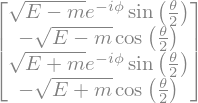

In [89]:
step2=P*step1;step2

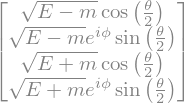

In [90]:
step2star=step2.subs(phi,-phi)
step3=T*step2star;step3

In [91]:
step3==hep.v(pexyz,-1)

True

The $S$ matrix is $CPT$ invariant ($CPT$ theorem). Therefore scattering amplitudes involving helicity spinors  are invariant with respect to replacing particles by antiparticles with reversed helicities.

## 5) Weyl representation

The popular Weyl representation is reached by the unitary transformation

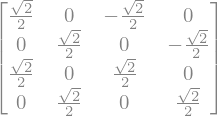

In [92]:
U=(hep.one+hep.g5*hep.g0)/sqrt(2);U

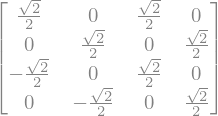

In [93]:
Uinv=U.inv();Uinv

Basically $\gamma_5$ and $\gamma^0$ are interchanged

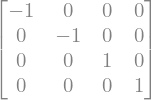

In [94]:
g5W=U*hep.g5*Uinv;g5W

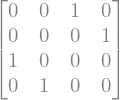

In [95]:
g0W=U*hep.g0*Uinv;g0W

In [96]:
g1W=U*hep.g1*Uinv

In [97]:
g2W=U*hep.g2*Uinv

In [98]:
g3W=U*hep.g3*Uinv

A typical Weyl spinor looks complicated at first sight

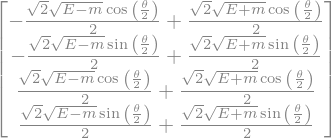

In [99]:
uW=U*hep.u(pe,1);uW

but with the help of e.g.

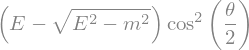

In [100]:
simplify(uW[0]**2)

we obtain simple expressions for the 4 Weyl helicity spinors

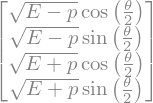

In [101]:
uWR=Matrix([[sqrt(E-p)*cos(theta/2)],[sqrt(E-p)*sin(theta/2)],
             [sqrt(E+p)*cos(theta/2)],[sqrt(E+p)*sin(theta/2)]]);uWR

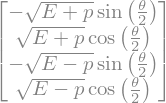

In [102]:
uWL=Matrix([[-sqrt(E+p)*sin(theta/2)],[sqrt(E+p)*cos(theta/2)],
             [-sqrt(E-p)*sin(theta/2)],[sqrt(E-p)*cos(theta/2)]]);uWL

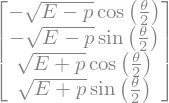

In [103]:
vWL=Matrix([[-sqrt(E-p)*cos(theta/2)],[-sqrt(E-p)*sin(theta/2)],
             [sqrt(E+p)*cos(theta/2)],[sqrt(E+p)*sin(theta/2)]]);vWL

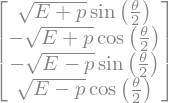

In [104]:
vWR=Matrix([[sqrt(E+p)*sin(theta/2)],[-sqrt(E+p)*cos(theta/2)],
             [-sqrt(E-p)*sin(theta/2)],[sqrt(E-p)*cos(theta/2)]]);vWR

The Weyl representation is particularly attractive for massless particles, because the spinors are reduced
to 2 components only, the Dirac equation is replaced by 2 Weyl equations

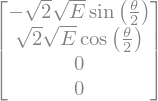

In [105]:
uWL.subs(p,E)

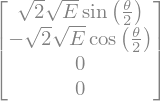

In [106]:
vWR.subs(p,E)

Masselose Weyl Sinoren mit Impuls in z-Achse:

In [107]:
uWL3=uWL.subs(p,E).subs(theta,0)
uWR3=uWR.subs(p,E).subs(theta,0)
vWL3=vWL.subs(p,E).subs(theta,0)
vWR3=vWR.subs(p,E).subs(theta,0)

In [108]:
g5W*vWR3==S3*vWR3

True

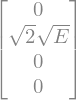

In [109]:
g5W*vWR3

### Untersuchung von Standard Spinoren
Zunächst Def der $u_1,u_2,v_1,v_2$

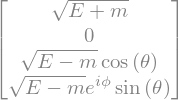

In [110]:
u1=Matrix([[sqrt(E+m)],[0],
             [sqrt(E-m)*cos(theta)],[sqrt(E-m)*sin(theta)*exp(I*phi)]]);u1

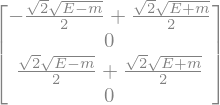

In [111]:
U*u1.subs(theta,0)

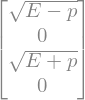

In [112]:
u1W=Matrix([[sqrt(E-p)],[0],
             [sqrt(E+p)],[0]]);u1W

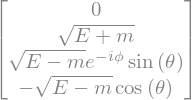

In [113]:
u2=Matrix([[0],[sqrt(E+m)],[sqrt(E-m)*sin(theta)*exp(-I*phi)],
             [-sqrt(E-m)*cos(theta)]]);u2

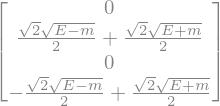

In [114]:
U*u2.subs(theta,0)

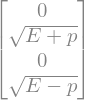

In [115]:
u2W=Matrix([[0],[sqrt(E+p)],
             [0],[sqrt(E-p)]]);u2W

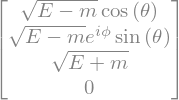

In [116]:
v1=Matrix([[sqrt(E-m)*cos(theta)],[sqrt(E-m)*sin(theta)*exp(I*phi)],
             [sqrt(E+m)],[0]]);v1

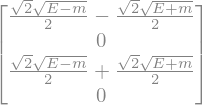

In [117]:
U*v1.subs(theta,0)

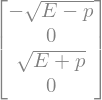

In [118]:
v1W=Matrix([[-sqrt(E-p)],[0],
             [sqrt(E+p)],[0]]);v1W

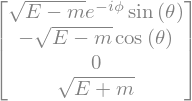

In [119]:
v2=Matrix([[sqrt(E-m)*sin(theta)*exp(-I*phi)],[-sqrt(E-m)*cos(theta)],
             [0],[sqrt(E+m)]]);v2

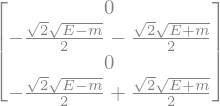

In [120]:
U*v2.subs(theta,0)

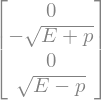

In [121]:
v2W=Matrix([[0],[-sqrt(E+p)],
             [0],[sqrt(E-p)]]);v2W

1. Parität

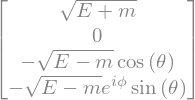

In [122]:
hep.g0*u1

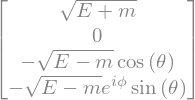

In [123]:
u1neg=expand(u1.subs(theta,pi-theta).subs(phi,pi+phi));u1neg

In [124]:
hep.g0*u1==u1neg

True

In [125]:
u2neg=expand(u2.subs(theta,pi-theta).subs(phi,pi+phi))

In [126]:
hep.g0*u2==u2neg

True

In [127]:
v1neg=expand(v1.subs(theta,pi-theta).subs(phi,pi+phi))

In [128]:
hep.g0*v1==-v1neg

True

In [129]:
v2neg=expand(v2.subs(theta,pi-theta).subs(phi,pi+phi))

In [130]:
hep.g0*v2==-v2neg

True

Das entspricht PS Seite 65 unten!

2. Zeit Spiegelung

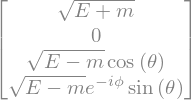

In [131]:
u1cc=u1.subs(phi,-phi);u1cc

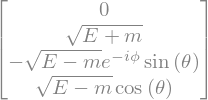

In [132]:
-hep.g1*hep.g3*u1cc

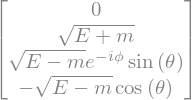

In [133]:
u1flip=u2;u1flip

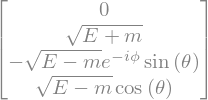

In [134]:
expand(u1flip.subs(theta,pi-theta).subs(phi,phi+pi))

#### Übungen zu Peskin Schroeder

In [135]:
eins=Matrix([[1,0],[0,1]])

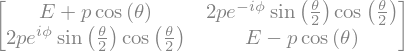

In [136]:
pdotsig=simplify(pe4xyz[0]*eins+pe4xyz[1]*hep.sig1+pe4xyz[2]*hep.sig2+
                 pe4xyz[3]*hep.sig3).subs(sqrt(E**2-m**2),p);pdotsig

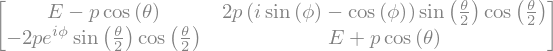

In [137]:
pdotsigbar=simplify(pe4xyz[0]*eins-pe4xyz[1]*hep.sig1-pe4xyz[2]*hep.sig2-
                 pe4xyz[3]*hep.sig3).subs(sqrt(E**2-m**2),p);pdotsigbar

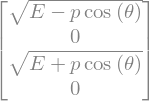

In [138]:
u1PS=Matrix([[sqrt(E-p*cos(theta))],[0],
             [sqrt(E+p*cos(theta))],[0]]);u1PS

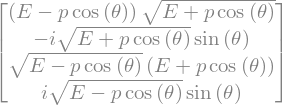

In [139]:
(g0W*E-g3W*p*cos(theta)-g2W*sin(theta))*u1PS

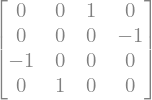

In [140]:
g3W

In [141]:
2*(E+sqrt(E**2-m**2))==(sqrt(E+m)+sqrt(E-m))**2

False

In [142]:
simplify(expand((sqrt(E+m)+sqrt(E-m))**2))

Dirac Gleichung für helizitätsspinoren

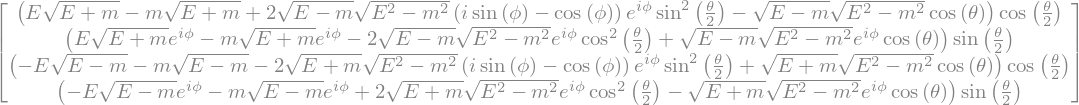

In [143]:
dir1=simplify(hep.dag(pe4xyz)*hep.u(pexyz,1)-m*hep.u(pexyz,1));dir1

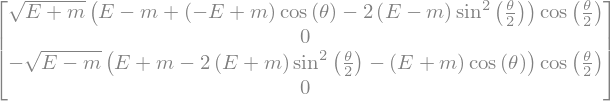

In [144]:
dir1v1=simplify(dir1.subs(sqrt(E**2-m**2),sqrt(E+m)*sqrt(E-m)));dir1v1

In [145]:
simplify(dir1v1.subs(cos(theta),1-2*sin(theta/2)**2))

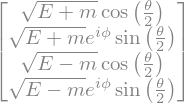

In [146]:
u1=hep.u(pexyz,1);u1

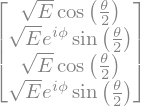

In [147]:
u2=u1.subs(m,0);u2

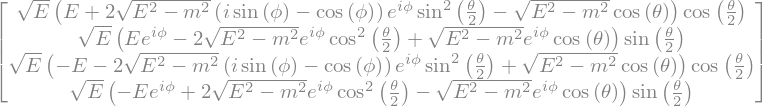

In [148]:
t1=simplify(hep.dag(pe4xyz)*u2);t1

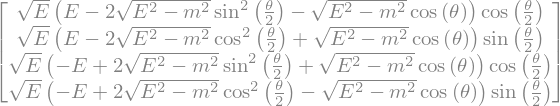

In [149]:
t2=simplify(t1.subs(sqrt(E**2-m**2),sqrt(E+m)*sqrt(E-m)).subs(phi,0));t2

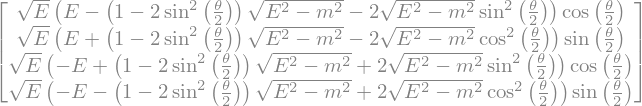

In [150]:
t3=t2.subs(cos(theta),1-2*sin(theta/2)**2);t3

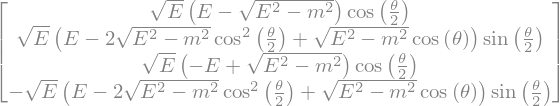

In [151]:
simplify(t3)

In [152]:
hep.g5*u1==u1

False

In [153]:
pe4z=hep.fourvec(pez)

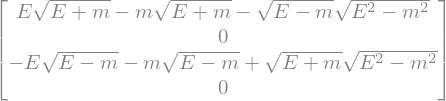

In [154]:
dir3=simplify(hep.dag(pe4z)*hep.u(pez,1)-m*hep.u(pez,1));dir3

In [155]:
simplify(dir3.subs(sqrt(E**2-m**2),sqrt(E+m)*sqrt(E-m)))

In [156]:
hep.projpl*H3==H3*hep.projpl

False

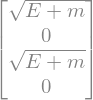

In [157]:
utst=hep.u(pez,1).subs(m,0)*sqrt(E+m)/sqrt(E);utst

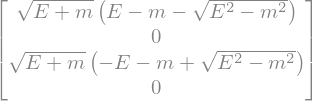

In [158]:
dir4=simplify(hep.dag(pe4z)*utst-m*utst);dir4

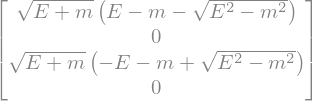

In [159]:
simplify(dir4.subs(sqrt(E**2-m**2),sqrt(E+m)*sqrt(E-m)))